In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.fftpack import fft
from sklearn.preprocessing import scale
import pandas as pd
import glob

In [6]:
filelist = glob.glob('*.dat')
for f in filelist:
    print('\'{0}\','.format(f))

'dc-balast_off_frame_pt_off_a.dat',
'dc-balast_off_frame_pt_on_a.dat',
'dc_-rv_off_frame_pt_off_a.dat',
'dc_-rv_off_frame_pt_on_a.dat',
'dc_off_frame_pt_off_a.dat',
'dc_off_frame_pt_off_b.dat',
'dc_off_frame_pt_off_c.dat',
'dc_off_frame_pt_off_d.dat',
'dc_off_frame_pt_off_e.dat',
'dc_off_frame_pt_on_a.dat',
'dc_off_frame_pt_on_aa.dat',
'dc_off_frame_pt_on_b.dat',
'dc_off_frame_pt_on_c.dat',
'dc_off_frame_pt_on_d.dat',
'dc_off_frame_pt_on_e.dat',
'dc_on_frame_pt_on_aa.dat',
'dc_on_frame_pt_on_bb.dat',
'dc_on_frame_pt_on_cc.dat',
'normal_setup_pt_off.dat',
'normal_setup_pt_off_a.dat',
'normal_setup_pt_on.dat',
'normal_setup_pt_on_a.dat',


<IPython.core.display.Javascript object>


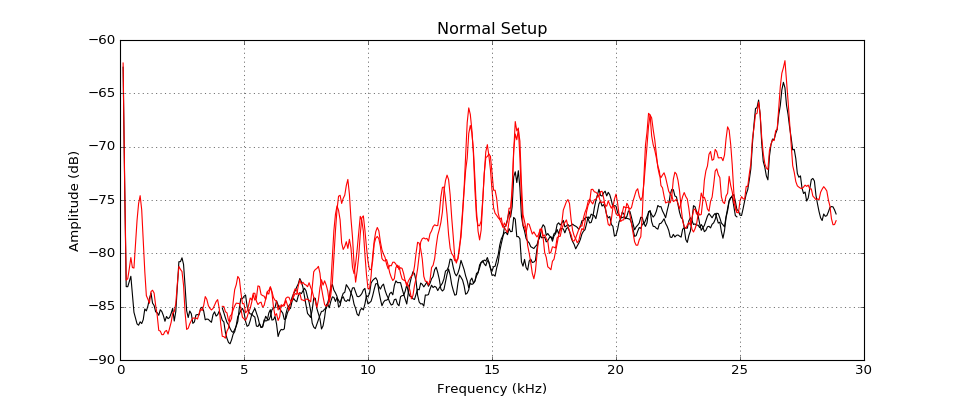

In [29]:
flist =['normal_setup_pt_off.dat',
        'normal_setup_pt_off_a.dat',
        'normal_setup_pt_on.dat',
        'normal_setup_pt_on_a.dat']

fig, ax = plt.subplots(1,1, figsize = (12,5))

for f in flist:
    data = np.loadtxt(f)
    df = pd.DataFrame({'freq':data[:,0], 'power':data[:,1]})
    df = df.rolling(window=5).mean()
    if 'pt_on' in f:
        c = 'r'
    else:
        c = 'k'
    ax.plot(df['freq']/1000.0, df['power'], color=c)
    
# ax.set_ylim(-95, -55)
ax.grid()
ax.set_title('Normal Setup')
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude (dB)')

<IPython.core.display.Javascript object>


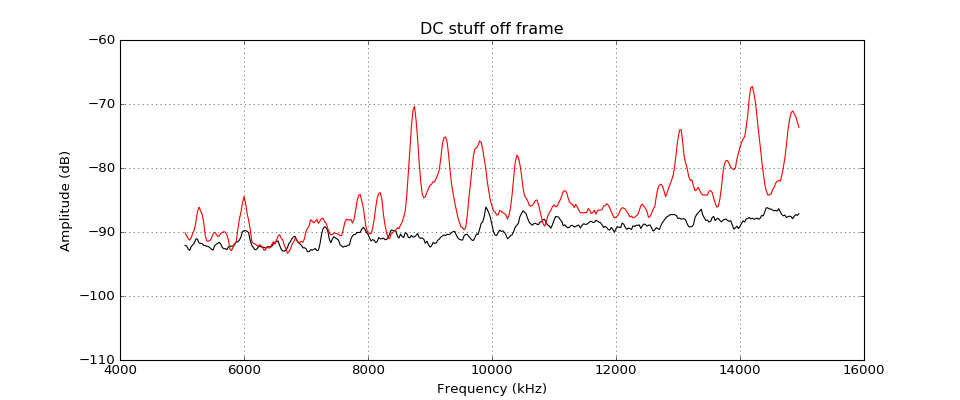

In [49]:
flist =[
#         'dc_off_frame_pt_off_a.dat',
#         'dc_off_frame_pt_off_b.dat',
#         'dc_off_frame_pt_off_c.dat',
#         'dc_off_frame_pt_off_d.dat',
        'dc_off_frame_pt_off_e.dat',
#         'dc_off_frame_pt_on_a.dat',
#         'dc_off_frame_pt_on_aa.dat',
#         'dc_off_frame_pt_on_b.dat',
#         'dc_off_frame_pt_on_c.dat',
#         'dc_off_frame_pt_on_d.dat',
        'dc_off_frame_pt_on_e.dat'
]

fig, ax = plt.subplots(1,1, figsize = (12,5))

for f in flist:
    data = np.loadtxt(f)
    df = pd.DataFrame({'freq':data[:,0], 'power':data[:,1]})
    df = df.rolling(window=5).mean()
    if '_on' in f:
        c = 'r'
    else:
        c = 'k'
    ax.plot(df['freq'], df['power'], color=c)
    
ax.set_ylim(-110, -60)
# ax.set_xscale('log')
ax.grid()
ax.set_title('DC stuff off frame')
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude (dB)')

<IPython.core.display.Javascript object>


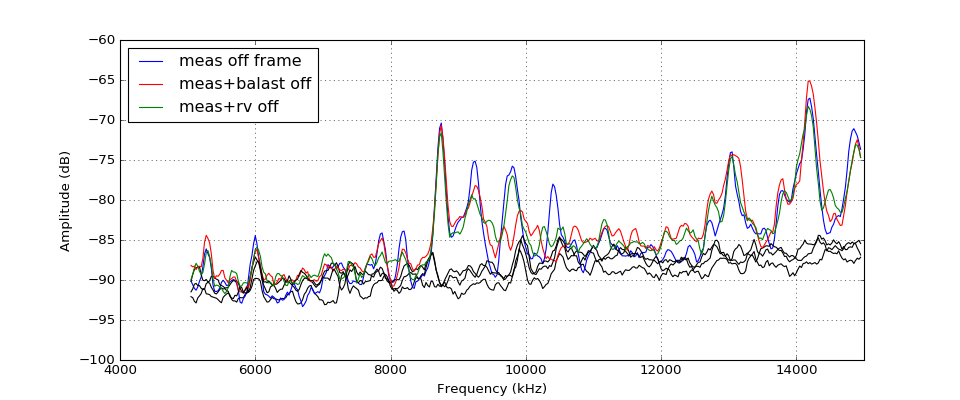

In [56]:
from collections import OrderedDict

fig, ax = plt.subplots(1,1, figsize = (12,5))

# flist =['normal_setup_pt_off_a.dat',
#         'normal_setup_pt_on_a.dat']

# for f in flist:
#     data = np.loadtxt(f)
#     df = pd.DataFrame({'freq':data[:,0], 'power':data[:,1]})
#     df = df.rolling(window=5).mean()
#     if '_on' in f:
#         c = 'm'
#     else:
#         c = 'k'
#     ax.plot(df['freq'], df['power'], color=c, label='normal setup')

flist =['dc_off_frame_pt_off_e.dat',
        'dc_off_frame_pt_on_e.dat']

for f in flist:
    data = np.loadtxt(f)
    df = pd.DataFrame({'freq':data[:,0], 'power':data[:,1]})
    df = df.rolling(window=5).mean()
    if '_on' in f:
        c = 'b'
    else:
        c = 'k'
    ax.plot(df['freq'], df['power'], color=c, label='meas off frame')
    
flist =['dc-balast_off_frame_pt_off_a.dat',
        'dc-balast_off_frame_pt_on_a.dat',]

for f in flist:
    data = np.loadtxt(f)
    df = pd.DataFrame({'freq':data[:,0], 'power':data[:,1]})
    df = df.rolling(window=5).mean()
    if '_on' in f:
        c = 'r'
    else:
        c = 'k'
    ax.plot(df['freq'], df['power'], color=c, label='meas+balast off')
    
flist =['dc_-rv_off_frame_pt_off_a.dat',
        'dc_-rv_off_frame_pt_on_a.dat']

for f in flist:
    data = np.loadtxt(f)
    df = pd.DataFrame({'freq':data[:,0], 'power':data[:,1]})
    df = df.rolling(window=5).mean()
    if '_on' in f:
        c = 'g'
    else:
        c = 'k'
    ax.plot(df['freq'], df['power'], color=c, label='meas+rv off')

ax.set_ylim(-100, -60)
ax.set_xlim(4000, 15000)
# ax.set_xscale('log')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left')
# ax.legend(loc='upper left')

ax.grid()
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude (dB)')